In [1]:
## importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings

warnings.filterwarnings("ignore")
pd.set_option("display.max.columns", None)
%matplotlib inline

In [3]:
df = pd.read_csv('car_price_prediction.csv')
df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [5]:
df.columns

Index(['ID', 'Price', 'Levy', 'Manufacturer', 'Model', 'Prod. year',
       'Category', 'Leather interior', 'Fuel type', 'Engine volume', 'Mileage',
       'Cylinders', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color',
       'Airbags'],
      dtype='object')

In [4]:
df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [5]:
df.columns

Index(['ID', 'Price', 'Levy', 'Manufacturer', 'Model', 'Prod. year',
       'Category', 'Leather interior', 'Fuel type', 'Engine volume', 'Mileage',
       'Cylinders', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color',
       'Airbags'],
      dtype='object')

In [6]:
df.rename(columns={"Prod. year": "Prod_year",
                  "Leather interior":"Leather_interior",
                   "Fuel type": "Fuel_type",
                   "Gear box type": "Gear_box_type"
                  }, inplace=True)

In [7]:
df = df[['Price', 'Model', 'Prod_year',
             'Leather_interior', 'Fuel_type', 'Mileage',
             'Gear_box_type','Airbags']]

In [8]:
df.head()

,Price,Model,Prod_year,Leather_interior,Fuel_type,Mileage,Gear_box_type,Airbags
0,13328,RX 450,2010,Yes,Hybrid,186005 km,Automatic,12
1,16621,Equinox,2011,No,Petrol,192000 km,Tiptronic,8
2,8467,FIT,2006,No,Petrol,200000 km,Variator,2
3,3607,Escape,2011,Yes,Hybrid,168966 km,Automatic,0
4,11726,FIT,2014,Yes,Petrol,91901 km,Automatic,4


In [9]:
df.isnull().sum()

Price               0
Model               0
Prod_year           0
Leather_interior    0
Fuel_type           0
Mileage             0
Gear_box_type       0
Airbags             0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Price             19237 non-null  int64 
 1   Model             19237 non-null  object
 2   Prod_year         19237 non-null  int64 
 3   Leather_interior  19237 non-null  object
 4   Fuel_type         19237 non-null  object
 5   Mileage           19237 non-null  object
 6   Gear_box_type     19237 non-null  object
 7   Airbags           19237 non-null  int64 
dtypes: int64(3), object(5)
memory usage: 1.2+ MB


In [11]:
## milage should be in ing type
df['Mileage'] = df['Mileage'].str.split(" ").apply(lambda x: int(x[0]))

In [12]:
df['Car_age'] = 2024 - df['Prod_year']

In [13]:
df.drop(columns='Prod_year', inplace=True)

In [14]:
df.shape

(19237, 8)

In [15]:
df.head()

,Price,Model,Leather_interior,Fuel_type,Mileage,Gear_box_type,Airbags,Car_age
0,13328,RX 450,Yes,Hybrid,186005,Automatic,12,14
1,16621,Equinox,No,Petrol,192000,Tiptronic,8,13
2,8467,FIT,No,Petrol,200000,Variator,2,18
3,3607,Escape,Yes,Hybrid,168966,Automatic,0,13
4,11726,FIT,Yes,Petrol,91901,Automatic,4,10


In [16]:
categorical_features = [col for col in df.columns if df[col].dtype=='O']
numerical_features = [col for col in df.columns if df[col].dtype!='O']

In [17]:
categorical_features

['Model', 'Leather_interior', 'Fuel_type', 'Gear_box_type']

In [18]:
df[categorical_features]

,Model,Leather_interior,Fuel_type,Gear_box_type
0,RX 450,Yes,Hybrid,Automatic
1,Equinox,No,Petrol,Tiptronic
2,FIT,No,Petrol,Variator
3,Escape,Yes,Hybrid,Automatic
4,FIT,Yes,Petrol,Automatic
...,...,...,...,...
19232,CLK 200,Yes,CNG,Manual
19233,Sonata,Yes,Petrol,Tiptronic
19234,Tucson,Yes,Diesel,Automatic
19235,Captiva,Yes,Diesel,Automatic


In [19]:
for col in categorical_features:
    size =  len(df[col].unique())
    print("\n===================================")
    print(f"Size of {col} - {size}")


Size of Model - 1590

Size of Leather_interior - 2

Size of Fuel_type - 7

Size of Gear_box_type - 4


In [20]:
model_index = df['Model'].value_counts()[df['Model'].value_counts(ascending=False) > 30].index

In [21]:
df[df['Model'].apply(lambda x: x in model_index)]['Model'].value_counts()

Model
Prius      1083
Sonata     1079
Camry       938
Elantra     922
E 350       542
           ... 
Q7           33
Q5           32
A6           32
X-Trail      31
530          31
Name: count, Length: 100, dtype: int64

In [22]:
df2 = df[df['Model'].apply(lambda x: x in model_index)]

In [23]:
df2.to_csv("train_car_data.csv", index=None)

In [24]:
df2.head()

,Price,Model,Leather_interior,Fuel_type,Mileage,Gear_box_type,Airbags,Car_age
0,13328,RX 450,Yes,Hybrid,186005,Automatic,12,14
2,8467,FIT,No,Petrol,200000,Variator,2,18
3,3607,Escape,Yes,Hybrid,168966,Automatic,0,13
4,11726,FIT,Yes,Petrol,91901,Automatic,4,10
5,39493,Santa FE,Yes,Diesel,160931,Automatic,4,8


In [25]:
categorical_features = [col for col in df2.columns if df2[col].dtype=='O']
numerical_features = [col for col in df2.columns if df2[col].dtype!='O']

In [26]:
df2[categorical_features]

,Model,Leather_interior,Fuel_type,Gear_box_type
0,RX 450,Yes,Hybrid,Automatic
2,FIT,No,Petrol,Variator
3,Escape,Yes,Hybrid,Automatic
4,FIT,Yes,Petrol,Automatic
5,Santa FE,Yes,Diesel,Automatic
...,...,...,...,...
19231,E 350,Yes,Diesel,Automatic
19233,Sonata,Yes,Petrol,Tiptronic
19234,Tucson,Yes,Diesel,Automatic
19235,Captiva,Yes,Diesel,Automatic


In [27]:
for col in categorical_features:
    size =  len(df2[col].unique())
    print("\n===================================")
    print(f"Size of {col} - {size}")


Size of Model - 100

Size of Leather_interior - 2

Size of Fuel_type - 6

Size of Gear_box_type - 4


In [28]:
df2[numerical_features].describe()

,Price,Mileage,Airbags,Car_age
count,1.484100e+04,1.484100e+04,14841.000000,14841.000000
mean,1.838078e+04,1.472759e+06,6.378950,12.317431
std,2.163978e+05,4.734784e+07,4.343729,4.748085
min,1.000000e+00,0.000000e+00,0.000000,4.000000
25%,4.861000e+03,7.154500e+04,4.000000,9.000000
50%,1.348500e+04,1.264000e+05,4.000000,11.000000
75%,2.219700e+04,1.888000e+05,12.000000,14.000000
max,2.630750e+07,2.147484e+09,16.000000,59.000000


In [29]:
for col in numerical_features:
    min = df2[col].min()
    max = df2[col].max()
    print(f"{col} min - {min} and {col} max - {max}")

Price min - 1 and Price max - 26307500
Mileage min - 0 and Mileage max - 2147483647
Airbags min - 0 and Airbags max - 16
Car_age min - 4 and Car_age max - 59


## Outliers in Price, milage and car_age features

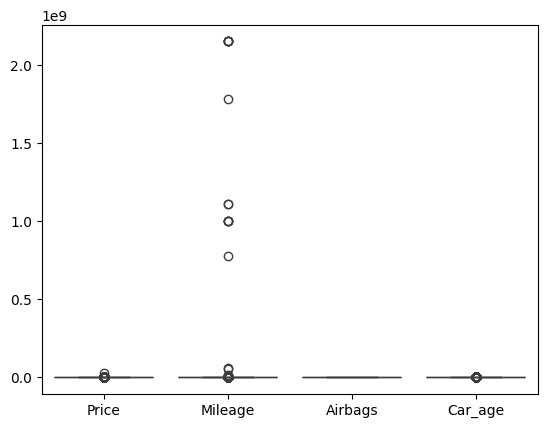

In [31]:
sns.boxplot(df2[numerical_features])
plt.show()

In [32]:
df2['Mileage']

0        186005
2        200000
3        168966
4         91901
5        160931
          ...  
19231    107800
19233    161600
19234    116365
19235     51258
19236    186923
Name: Mileage, Length: 14841, dtype: int64

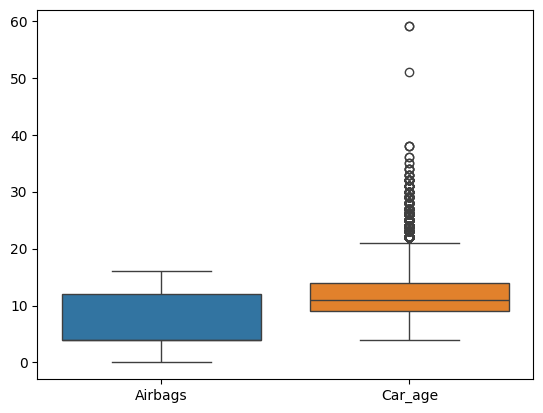

In [33]:
sns.boxplot(df2[['Airbags', 'Car_age']])
plt.show()

In [34]:
for col in numerical_features:
    q1 = df2[col].quantile(0.25)
    q3  =df2[col].quantile(0.75)
    iqr  = q3 - q1
    lower = q1 - iqr*1.5
    upper = q3 + iqr*1.5
    print(f"{col} upper is {upper} and lower is {lower}")

Price upper is 48201.0 and lower is -21143.0
Mileage upper is 364682.5 and lower is -104337.5
Airbags upper is 24.0 and lower is -8.0
Car_age upper is 21.5 and lower is 1.5


In [35]:
car_price_lower_threshold = 1000

In [36]:
df2[df2['Mileage'] < 1000000].shape

(14791, 8)

In [37]:
df3 = df2[df2['Mileage'] < 200000]
df3.shape

(11559, 8)

In [38]:
df4 = df3[df3['Price'] > 500]

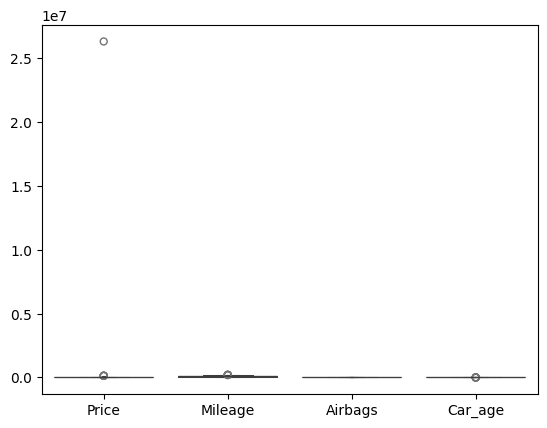

In [39]:
sns.boxenplot(df4[numerical_features])
plt.show()

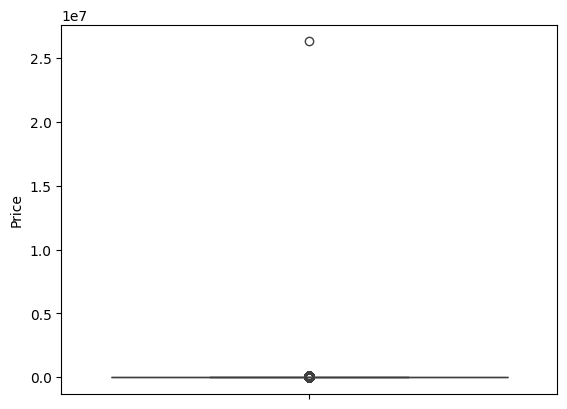

In [40]:
sns.boxplot(df4['Price'])
plt.show()

In [41]:
for col in numerical_features:
    q1 = df4[col].quantile(0.25)
    q3  =df4[col].quantile(0.75)
    iqr  = q3 - q1
    lower = q1 - iqr*1.5
    upper = q3 + iqr*1.5
    print(f"{col} upper is {upper} and lower is {lower}")

df5 = df4[(df4[col] > lower) & (df4[col] < upper)]

Price upper is 51265.375 and lower is -16709.625
Mileage upper is 271239.375 and lower is -68065.625
Airbags upper is 24.0 and lower is -8.0
Car_age upper is 19.0 and lower is 3.0


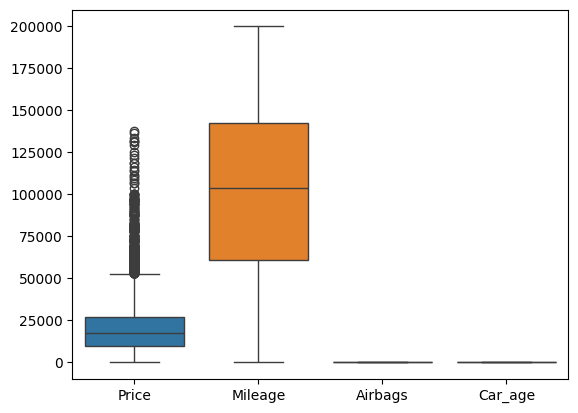

In [42]:
sns.boxplot(df5[numerical_features])
plt.show()

In [43]:
df5

,Price,Model,Leather_interior,Fuel_type,Mileage,Gear_box_type,Airbags,Car_age
0,13328,RX 450,Yes,Hybrid,186005,Automatic,12,14
3,3607,Escape,Yes,Hybrid,168966,Automatic,0,13
4,11726,FIT,Yes,Petrol,91901,Automatic,4,10
5,39493,Santa FE,Yes,Diesel,160931,Automatic,4,8
9,26657,RX 350,Yes,Petrol,128500,Automatic,12,17
...,...,...,...,...,...,...,...,...
19228,706,E 350,Yes,Diesel,122874,Automatic,12,16
19231,5802,E 350,Yes,Diesel,107800,Automatic,12,11
19233,15681,Sonata,Yes,Petrol,161600,Tiptronic,8,13
19234,26108,Tucson,Yes,Diesel,116365,Automatic,4,14


In [44]:
df5.to_csv("trained_car_dataset.csv", index=None)

In [45]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df5.drop(columns='Price'),
                                                   df5['Price'],
                                                   test_size=0.2,
                                                   random_state=42)

X_train.shape, X_test.shape

((7822, 7), (1956, 7))

In [46]:
categorical_features = [col for col in X_train.columns if X_train[col].dtype=='O']
numerical_features = [col for col in X_train.columns if X_train[col].dtype!='O']

In [47]:
## one hot encoding
from sklearn.preprocessing import OneHotEncoder

ohe_encoder = OneHotEncoder(drop='first')
X_train_encoded = ohe_encoder.fit_transform(X_train[categorical_features]).toarray()
X_test_encoded = ohe_encoder.transform(X_test[categorical_features]).toarray()

In [131]:
## save the model onehot encoder
pickle.dump(ohe_encoder, open("ohe_encoder.pkl", "wb"))

In [48]:
## scale the numerical features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train[numerical_features])
X_test_scaled = scaler.transform(X_test[numerical_features])

In [135]:
## save the model scaler
pickle.dump(scaler, open("scaler.pkl", "wb"))

In [49]:
X_train_scaled

array([[ 0.06684091, -0.6148211 ,  0.43579457],
       [-1.40220668, -0.6148211 , -1.70271553],
       [ 0.0151284 , -0.6148211 , -0.98987883],
       ...,
       [-0.41477519, -0.6148211 , -0.63346048],
       [-0.94043555, -0.6148211 ,  1.14863126],
       [ 0.06647484, -1.579493  , -0.63346048]])

In [50]:
## concatinate encoded and scaled data
X_train_df = pd.concat((pd.DataFrame(X_train_encoded), pd.DataFrame(X_train_scaled)), axis=1)
X_test_df = pd.concat((pd.DataFrame(X_test_encoded), pd.DataFrame(X_test_scaled)), axis=1)

In [51]:
X_train_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,0,1,2
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.066841,-0.614821,0.435795
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-1.402207,-0.614821,-1.702716
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.015128,-0.614821,-0.989879
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-0.900572,-1.579493,-1.702716
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.382145,-0.614821,0.435795
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7817,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-1.272598,-0.614821,-1.346297
7818,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.895378,0.349851,0.792213
7819,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [105]:
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [107]:
##Create a Function to Evaluate Model
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [109]:
## Beginning Model Training
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
   
}

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train_df, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train_df)
    y_test_pred = model.predict(X_test_df)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 11878.9032
- Mean Absolute Error: 8367.0252
- R2 Score: 0.4914
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 11741.4459
- Mean Absolute Error: 8315.5720
- R2 Score: 0.5090


Lasso
Model performance for Training set
- Root Mean Squared Error: 11884.0055
- Mean Absolute Error: 8371.9154
- R2 Score: 0.4909
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 11746.8093
- Mean Absolute Error: 8327.5191
- R2 Score: 0.5086


Ridge
Model performance for Training set
- Root Mean Squared Error: 11888.3042
- Mean Absolute Error: 8373.2390
- R2 Score: 0.4906
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 11723.6799
- Mean Absolute Error: 8320.7399
- R2 Score: 0.5105


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 7068.5398
- Mean Absolute Error: 3792

In [111]:
knn_params = {"n_neighbors": [2, 3, 10, 20, 40, 50]}
rf_params = {"max_depth": [5, 8, 15, None, 10],
             "max_features": [5, 7, "auto", 8],
             "min_samples_split": [2, 8, 15, 20],
             "n_estimators": [100, 200, 500, 1000]}

In [113]:
# Models list for Hyperparameter tuning
randomcv_models = [('KNN', KNeighborsRegressor(), knn_params),
                   ("RF", RandomForestRegressor(), rf_params)]

In [115]:
##Hyperparameter Tuning
import pickle
from sklearn.model_selection import RandomizedSearchCV

model_param = {}
for name, model, params in randomcv_models:
    random = RandomizedSearchCV(estimator=model,
                                   param_distributions=params,
                                   n_iter=100,
                                   cv=3,
                                   verbose=2,
                                   n_jobs=-1)
    random.fit(X_train_df, y_train)
    model_param[name] = random.best_params_

for model_name in model_param:
    print(f"---------------- Best Params for {model_name} -------------------")
    print(model_param[model_name])

Fitting 3 folds for each of 6 candidates, totalling 18 fits
Fitting 3 folds for each of 100 candidates, totalling 300 fits
---------------- Best Params for KNN -------------------
{'n_neighbors': 3}
---------------- Best Params for RF -------------------
{'n_estimators': 500, 'min_samples_split': 2, 'max_features': 8, 'max_depth': None}


In [125]:
## Retraining the models with best parameters
import pickle

models = {
    "RandomForest": RandomForestRegressor(n_estimators=500, min_samples_split=2, max_features=8, max_depth=None, 
                                                     n_jobs=-1),
     "K-Neighbors": KNeighborsRegressor(n_neighbors=3, n_jobs=-1)
    
}

for i in range(len(models)):
    name, model = list(models.items())[i]
# for i in range(len(models)):
#     model = list(models.values())[i]
    model.fit(X_train_df, y_train) # Train model

    # save the model
    with open(f"{name}.pkl", 'wb') as file:
        pickle.dump(model, file)

    # Make predictions
    y_train_pred = model.predict(X_train_df)
    y_test_pred = model.predict(X_test_df)

    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)
    
    print(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    
    print('='*35)
    print('\n')

RandomForest
Model performance for Training set
- Root Mean Squared Error: 3476.7141
- Mean Absolute Error: 1685.3355
- R2 Score: 0.9564
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 7639.7720
- Mean Absolute Error: 4260.7140
- R2 Score: 0.7921


K-Neighbors
Model performance for Training set
- Root Mean Squared Error: 6233.7906
- Mean Absolute Error: 3105.9648
- R2 Score: 0.8599
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 8427.5117
- Mean Absolute Error: 4673.6270
- R2 Score: 0.7471




## Model Testing

In [249]:
rf_model = pickle.load(open("RandomForest.pkl", 'rb'))
scaler_model = pickle.load(open("scaler.pkl", "rb"))
ohe_encoder_model = pickle.load(open("ohe_encoder.pkl", "rb"))

In [190]:
y_pred = rf_model.predict(X_test_df)

In [192]:
error = y_test - y_pred
error

5191     -3727.574000
3458      1014.265667
4524     -2224.786000
951       3035.110000
15187    18112.796000
             ...     
4619     -2440.276000
18605    -3301.936000
14563     4086.492000
10835      292.028893
14527     5144.792000
Name: Price, Length: 1956, dtype: float64

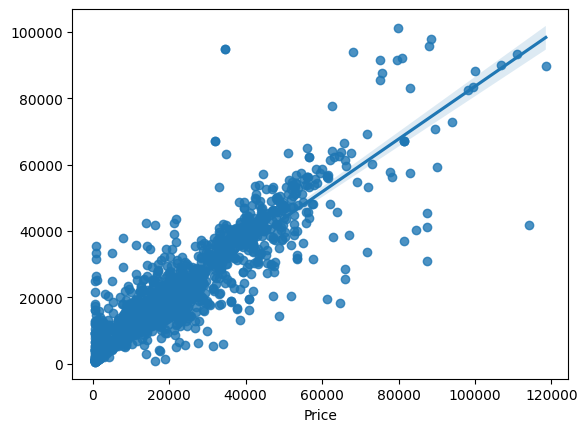

In [195]:
sns.regplot(x=y_test, y=y_pred)
plt.show()

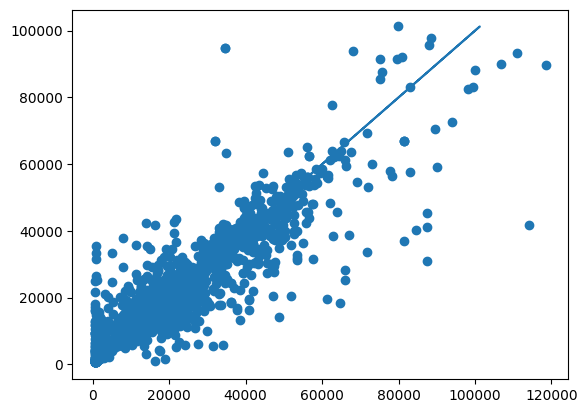

In [197]:
plt.scatter(y_test, y_pred)
plt.plot(y_pred, rf_model.predict(X_test_df))
plt.show()

In [ ]:
df

In [231]:
df5.loc[0].index

Index(['Price', 'Model', 'Leather_interior', 'Fuel_type', 'Mileage',
       'Gear_box_type', 'Airbags', 'Car_age'],
      dtype='object')

In [298]:
df5.loc[14844]

Price                   24628
Model                      H1
Leather_interior          Yes
Fuel_type              Diesel
Mileage                 47676
Gear_box_type       Automatic
Airbags                     4
Car_age                    13
Name: 14844, dtype: object

In [286]:
input_df = df5.drop(columns='Price').sample()
input_df

,Model,Leather_interior,Fuel_type,Mileage,Gear_box_type,Airbags,Car_age
14844,H1,Yes,Diesel,47676,Automatic,4,13


In [288]:
cat_col = [col for col in input_df.columns if input_df[col].dtype=='O']
num_col = [col for col in input_df.columns if input_df[col].dtype!='O']

In [290]:
encoded_input = ohe_encoder_model.transform(input_df[cat_col]).toarray()
encoded_input

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 1., 1., 0., 0., 0., 0., 0., 0., 0.]])

In [292]:
scaled_input = scaler_model.transform(input_df[num_col])
scaled_input

array([[-1.03756027, -0.6148211 ,  0.79221291]])

In [294]:
main_input_df = pd.concat((pd.DataFrame(encoded_input), pd.DataFrame(scaled_input)), axis=1)
main_input_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,0,1,2
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.03756,-0.614821,0.792213


In [296]:
rf_model.predict(main_input_df)

array([21921.46])

In [3]:
import pandas as pd
a = "a"
b = "b"
pd.DataFrame([[a, b]])

,0,1
0,a,b
